In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train=pd.read_csv("C:\\Users\\Dell\\Desktop\\titanic_train.csv")

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

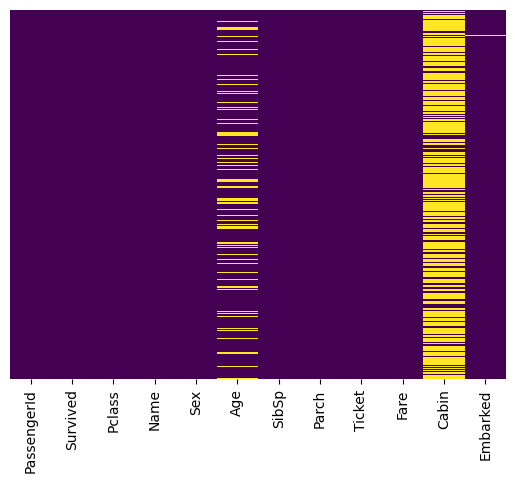

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') ## nan values is mostly presented in age and cabin 

<Axes: xlabel='Survived', ylabel='count'>

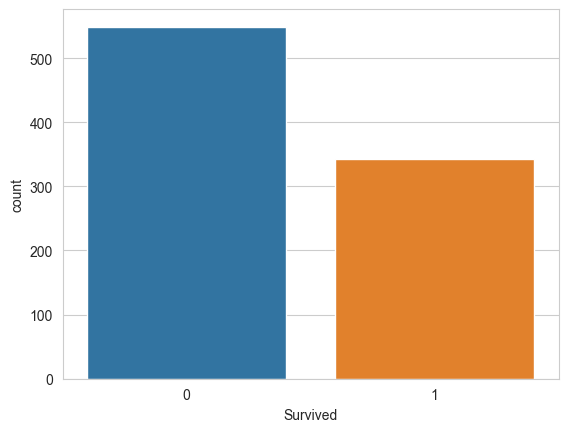

In [10]:
## how to handle nan value
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train) ## according to data 0 means not survived and 1 means survived

### this graphs show us that more than 500 people were unable to survive and around more than 300 ppl were able to survived

<Axes: xlabel='Survived', ylabel='count'>

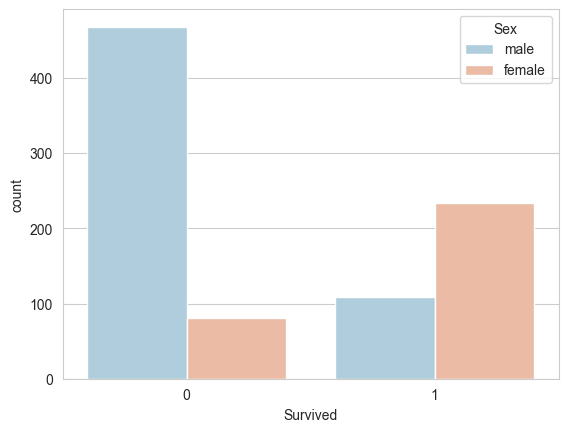

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### with this we could conclude that the number of men survived  was far greater than that of men

<Axes: xlabel='Survived', ylabel='count'>

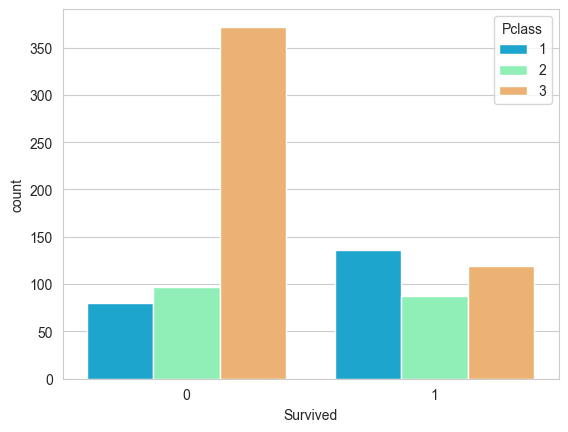

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

### here Pclass 1st class,2nd class,3rd class here we can see that the 1st and 2nd class has more survivors that or 3rd class

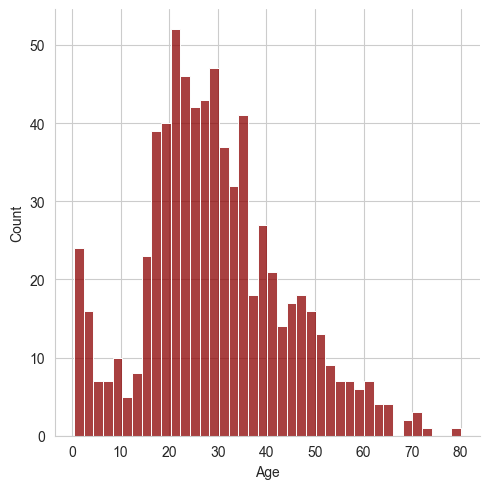

In [16]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

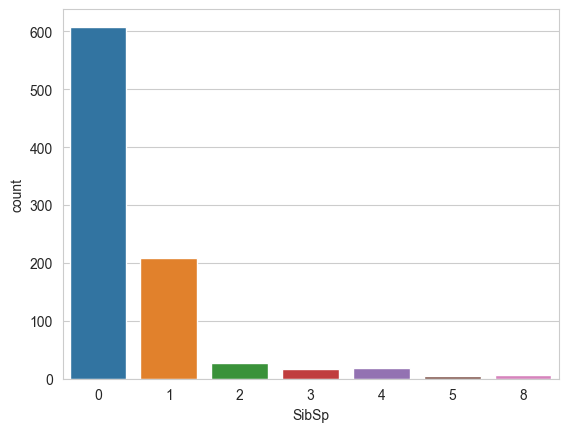

In [18]:
sns.countplot(x='SibSp',data=train)

### around 600 people had no sibling and spouse and around 200 had one sibling and spouse so on

<Axes: >

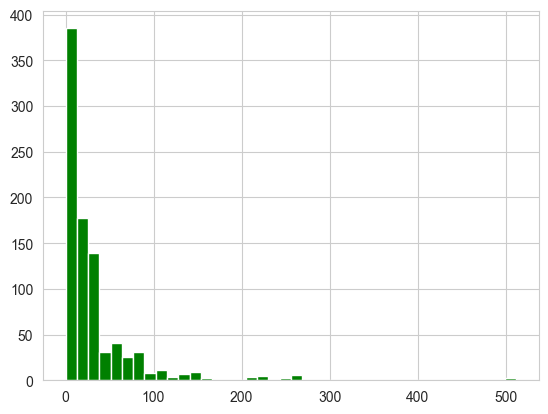

In [22]:
train['Fare'].hist(color='green',bins=40,)

# Data cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

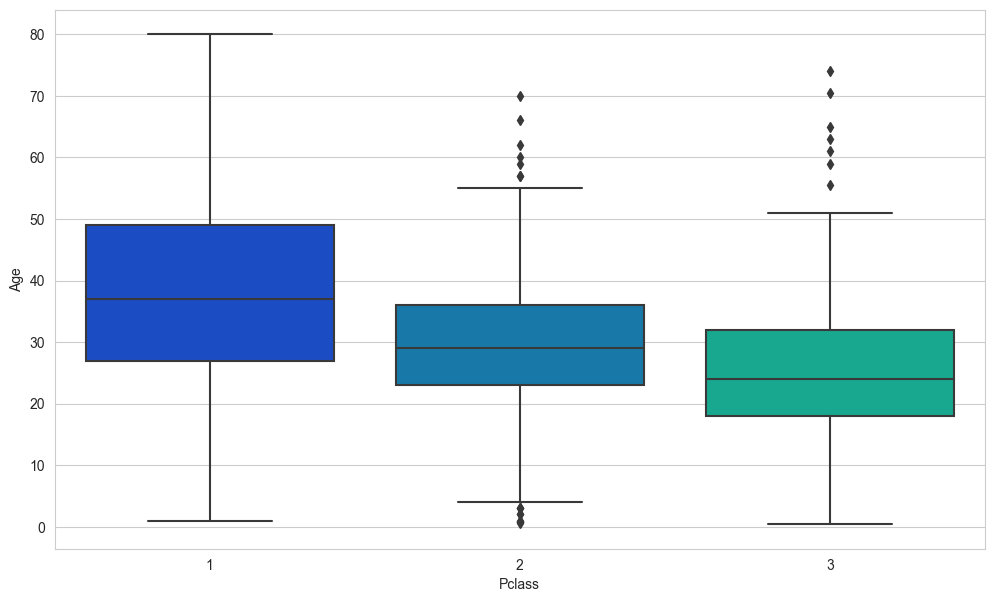

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [25]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

#### apply this function to remove nan values from train data

In [26]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

<Axes: >

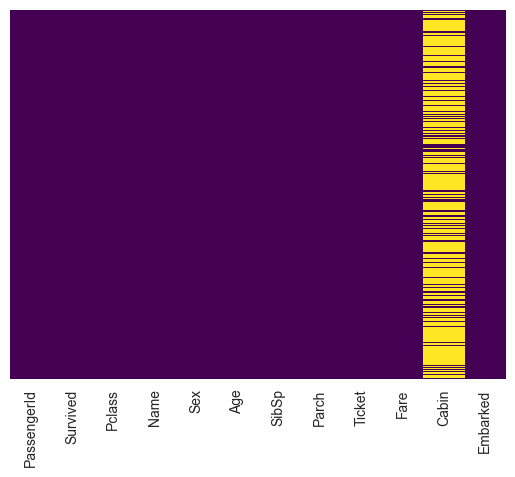

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

#### so many null values so we will drop  this column cabin

In [29]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

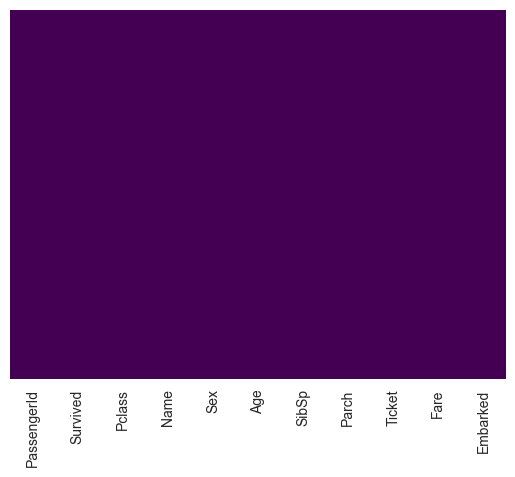

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# self practice


In [2]:
ship=pd.read_csv("C:\\Users\\Dell\\Desktop\\titanic_train.csv")

In [3]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ship.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

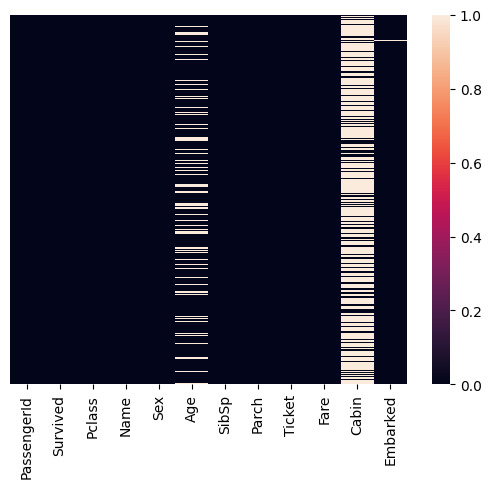

In [5]:
sns.heatmap(ship.isnull(),yticklabels=False)

<Axes: xlabel='Survived', ylabel='count'>

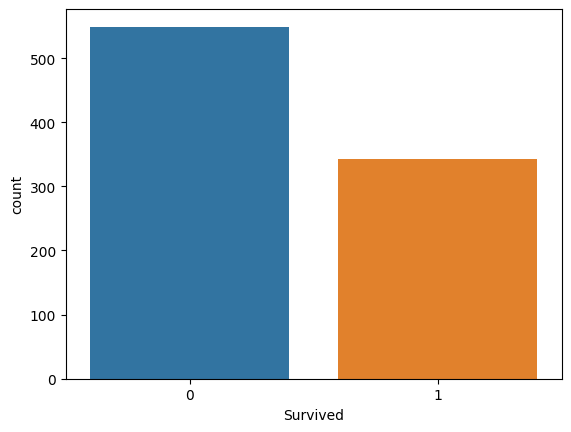

In [6]:
sns.countplot(x="Survived",data=ship)

#### here 0 means not survived and 1 means survived

<Axes: xlabel='Survived', ylabel='count'>

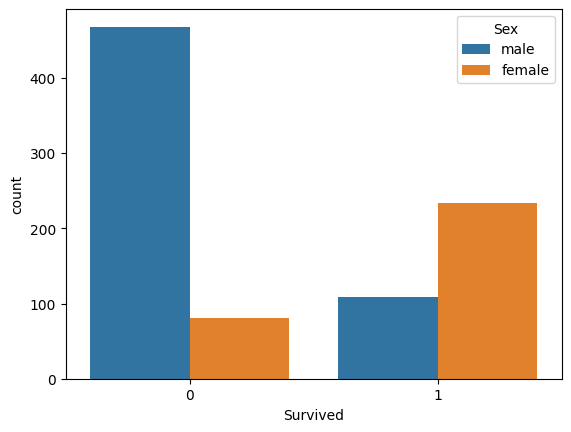

In [8]:
sns.countplot(x="Survived",hue="Sex",data=ship)

### this graph shows us that feamle survivar were more than that of males

<Axes: xlabel='Survived', ylabel='count'>

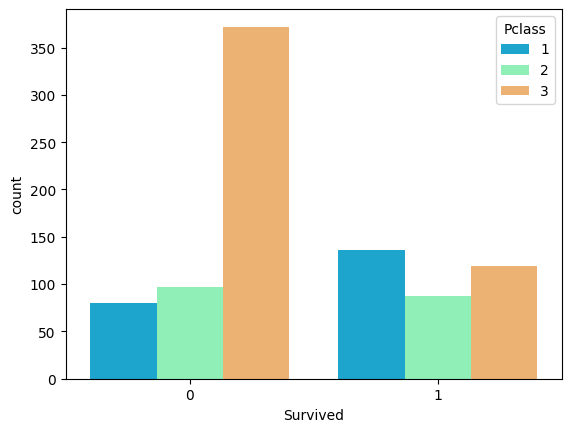

In [10]:
sns.countplot(x="Survived",hue="Pclass",data=ship,palette="rainbow")

#### this shows that pclass 3 has least survivors

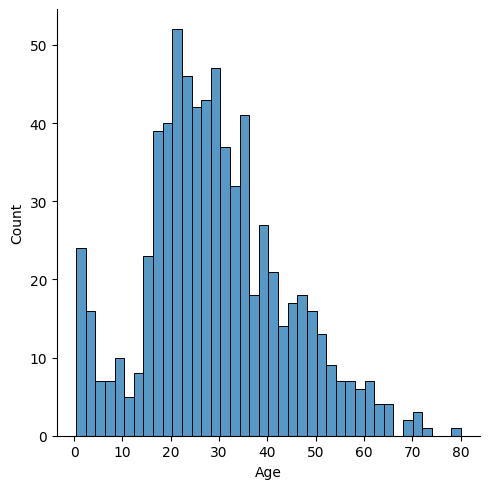

In [18]:
sns.displot(ship["Age"].dropna(),bins=40)

### this will help us to see what age group ppl were present most in the ship

# Cleaning Data

<Axes: xlabel='Pclass', ylabel='Age'>

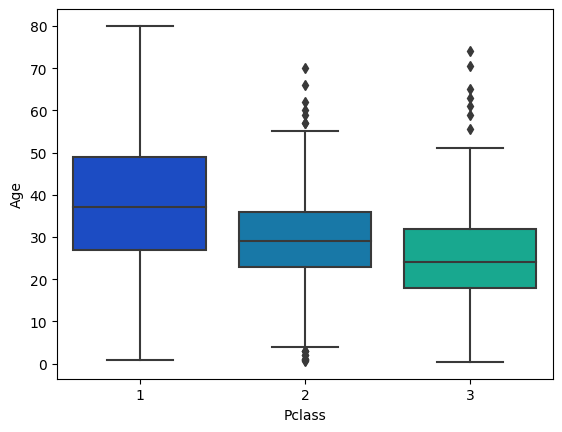

In [20]:
sns.boxplot(x="Pclass",y="Age",palette="winter",data=ship)

In [26]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
ship['Age']=ship[['Age','Pclass']].apply(input_age,axis=1)

<Axes: >

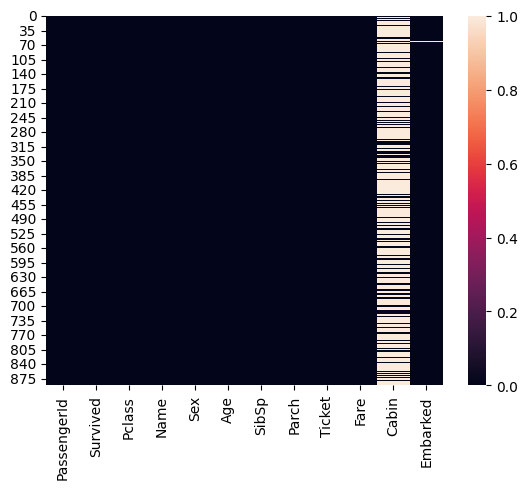

In [28]:
sns.heatmap(ship.isnull())

In [36]:
ship.drop("Cabin",axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
ship.drop("Cabin",axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [41]:
ship.dropna(inplace=True)

## converting categorical features

In [43]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [46]:
pd.get_dummies(ship['Embarked'],drop_first=True).head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [47]:
sex=pd.get_dummies(ship['Sex'],drop_first=True)
embark=pd.get_dummies(ship['Embarked'],drop_first=True)

In [53]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
1,2,1,1,38.0,1,0,71.2833,C85
3,4,1,1,35.0,1,0,53.1000,C123
6,7,0,1,54.0,0,0,51.8625,E46
10,11,1,3,4.0,1,1,16.7000,G6
11,12,1,1,58.0,0,0,26.5500,C103


In [56]:
ship.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


In [58]:
ship=pd.concat([ship,sex,embark],axis=1)

In [59]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,False,False,False
3,4,1,1,35.0,1,0,53.1000,C123,False,False,True
6,7,0,1,54.0,0,0,51.8625,E46,True,False,True
10,11,1,3,4.0,1,1,16.7000,G6,False,False,True
11,12,1,1,58.0,0,0,26.5500,C103,False,False,True
